In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.columns = ['C_ID','Gener','Age','AnnualIncome','SpendingScore']
df.head()

,C_ID,Gener,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
x = df[['AnnualIncome','SpendingScore']].values
print(type(x))
print(x[:5])

<class 'numpy.ndarray'>
[[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]]


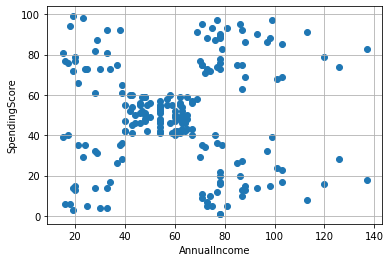

In [5]:
plt.scatter(x[:,0],x[:,1])
plt.xlabel('AnnualIncome')
plt.ylabel('SpendingScore')
plt.grid()
plt.show()

In [6]:
from sklearn.cluster import KMeans

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


WCSS
 [269981.28, 181363.59595959593, 106348.37306211118, 73679.78903948836, 44448.45544793371, 37265.86520484347, 30273.394312070042, 25063.652515864094, 21809.927562615187, 19669.71099830122, 17615.645251508537, 16013.607384678813, 14263.01384891385, 12797.180630643867, 11956.544877344875, 11035.561033652339, 10287.997533263839, 9448.724467418546, 8616.576634064997]


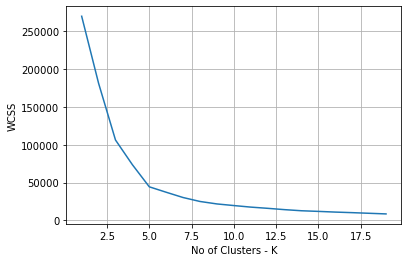

In [7]:
wcss = []
for i in range(1,20):          # i = 0,1,2,...19
    m = KMeans(n_clusters=i)
    m.fit(x)
    wcss.append(m.inertia_)
    
print('WCSS\n',wcss)
plt.plot(list(range(1,20)),wcss)
plt.xlabel('No of Clusters - K')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [8]:
from sklearn.metrics import silhouette_score

In [9]:
for i in range(2,15):
    m = KMeans(n_clusters=i).fit(x)
    print(f'Silhoutte Score at Clusters {i} is {silhouette_score(x,m.labels_)}')

Silhoutte Score at Clusters 2 is 0.2968969162503008
Silhoutte Score at Clusters 3 is 0.46761358158775435
Silhoutte Score at Clusters 4 is 0.4931963109249047
Silhoutte Score at Clusters 5 is 0.553931997444648
Silhoutte Score at Clusters 6 is 0.5393922132561455
Silhoutte Score at Clusters 7 is 0.5321706886465517
Silhoutte Score at Clusters 8 is 0.45697007065559897
Silhoutte Score at Clusters 9 is 0.4553729779390266
Silhoutte Score at Clusters 10 is 0.4494755585987857
Silhoutte Score at Clusters 11 is 0.4324681912677143
Silhoutte Score at Clusters 12 is 0.42466125581857567
Silhoutte Score at Clusters 13 is 0.4121648537300382
Silhoutte Score at Clusters 14 is 0.43651886589107053


In [10]:
k5 = KMeans(n_clusters=5)
k5.fit(x)

KMeans(n_clusters=5)

In [11]:
ypred5 = k5.predict(x)
print(ypred5)

[0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 2 0 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 3 1 2 1 3 1 3 1 2 1 3 1 3 1 3 1 3 1 2 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


In [12]:
cent5 = k5.cluster_centers_
print(cent5)

[[26.30434783 20.91304348]
 [86.53846154 82.12820513]
 [55.2962963  49.51851852]
 [88.2        17.11428571]
 [25.72727273 79.36363636]]


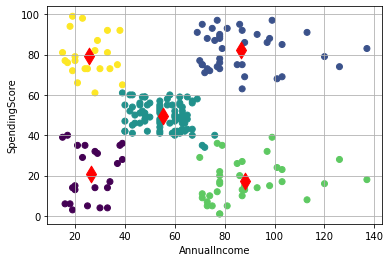

In [13]:
plt.scatter(x[:,0],x[:,1],c=ypred5)
plt.scatter(cent5[:,0],cent5[:,1],color='red',marker='d',s=140)
plt.xlabel('AnnualIncome')
plt.ylabel('SpendingScore')
plt.grid()
plt.show()

In [14]:
k3 = KMeans(n_clusters=3)
k3.fit(x)

KMeans(n_clusters=3)

In [15]:
ypred3 = k3.predict(x)
print(ypred3)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


In [16]:
cent3 = k3.cluster_centers_
print(cent3)

[[87.         18.63157895]
 [86.53846154 82.12820513]
 [44.15447154 49.82926829]]


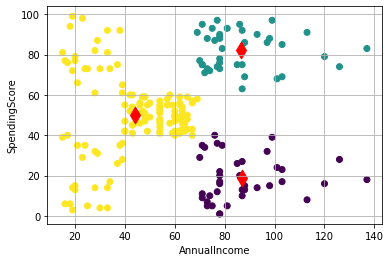

In [17]:
plt.scatter(x[:,0],x[:,1],c=ypred3)
plt.scatter(cent3[:,0],cent3[:,1],color='red',marker='d',s=140)
plt.xlabel('AnnualIncome')
plt.ylabel('SpendingScore')
plt.grid()
plt.show()